In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from os import sys
from ipywidgets import interact, IntSlider

In [2]:
sys.path.append('../')
import gridemic

In [3]:
R_zero = []
final_infected_ratio = []

for p_trans in np.linspace(0.05, 0.2, 26): 

    SEIIR = gridemic.Model(seed_random = 1, N = 500, 
                    tauW = 0.5 * p_trans, etaW = 0.25 * p_trans, 
                    tauS = 1.0 * p_trans, etaS = 0.5 * p_trans, 
                    prob_trace = 0.75, prob_detect=0.75,
                    test_begin=1e99)
    basic_reproduction_number = SEIIR.reproduction_number()

    population = SEIIR.simulate(NTime = 1000)

    final_infected_ratio.append(np.sum(population[SEIIR.time - 1, 1:5]) 
                             / (SEIIR.N) ** 2)
    R_zero.append(basic_reproduction_number)

Text(0, 0.5, 'Final infected ratio')

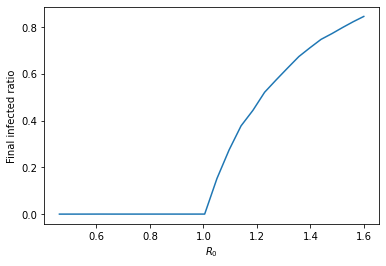

In [4]:
plt.plot(R_zero, final_infected_ratio)
plt.xlabel("$R_0$")
plt.ylabel("Final infected ratio")